In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew

In [40]:
df = pd.read_csv("../input/House_Prices/train.csv")

In [41]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

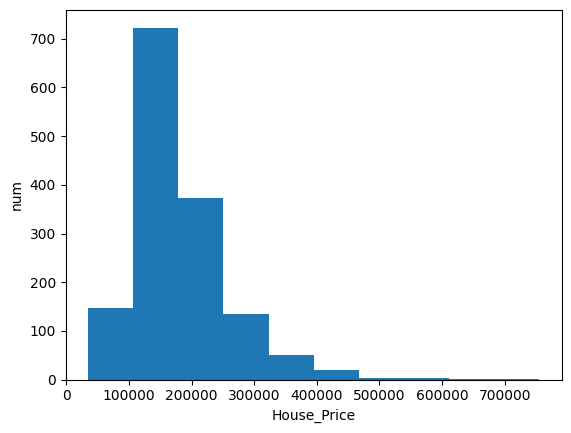

In [42]:
fig, ax = plt.subplots()
ax.set_xlabel("House_Price")
ax.set_ylabel("num")
ax.hist(df["SalePrice"])



<Axes: xlabel='SalePrice', ylabel='Density'>

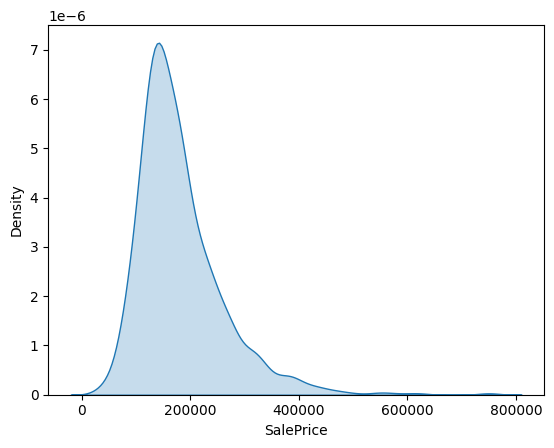

In [43]:
# KDE
sns.kdeplot(data=df["SalePrice"], fill=True)

<Axes: xlabel='SalePrice', ylabel='Density'>

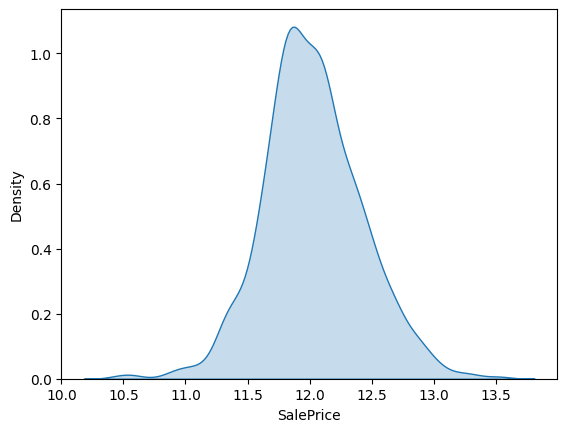

In [44]:
# 対数変換
SalePrice = np.log1p(df["SalePrice"])
sns.kdeplot(data=SalePrice, fill=True)

In [45]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [46]:
from sklearn.feature_selection import mutual_info_regression

# 簡易的なラベルエンコーディングでカテゴリ変数を数値化
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# 欠損値は暫定的に-1で埋める（本来は精査が必要）
X = X.fillna(-1)

# 相互情報量の計算
mi_scores = mutual_info_regression(X, y, random_state=42)
mi_results = pd.Series(mi_scores, name="MI Scores", index=X.columns)
print(mi_results.nlargest(10))

OverallQual     0.568904
Neighborhood    0.494713
GrLivArea       0.481575
GarageCars      0.380043
YearBuilt       0.376172
TotalBsmtSF     0.367908
GarageArea      0.360442
BsmtQual        0.326786
KitchenQual     0.322531
ExterQual       0.319603
Name: MI Scores, dtype: float64


In [47]:
sum(df["GarageCars"].isnull())

0

In [48]:
df["MSSubClass"]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [49]:
def fill_missing_values(df):
    df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
    for col in none_cols:
        df[col] = df[col].fillna("None")
    
    zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
    for col in zero_cols:
        df[col] = df[col].fillna(0)

    return df

In [50]:
def convert_dtypes(df):
    cols_to_str = ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']
    for col in cols_to_str:
        df[col] = df[col].apply(str)
    return(df)


In [51]:
df = fill_missing_values(df)
df = convert_dtypes(df)

In [52]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

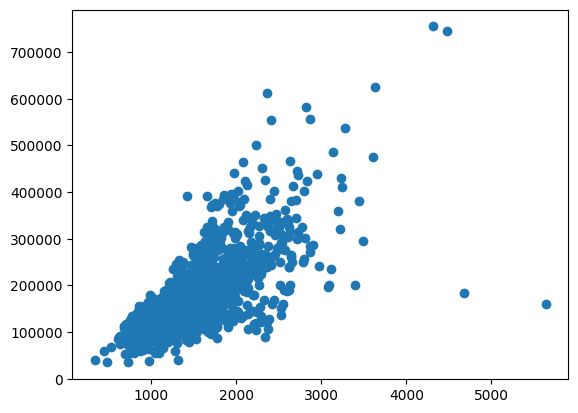

In [53]:
plt.scatter(df["GrLivArea"], df["SalePrice"])